### In this method we are dividing our 20sample data sets into 5 test sample and 15 training sample


In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
data = pd.read_csv(r'/content/sample_data/DSS2.csv')
data['SampleID'].unique()

array(['ERR035487', 'ERR035488', 'ERR035489', 'ERR166303', 'ERR166304',
       'ERR166307', 'ERR166310', 'ERR166312', 'ERR166335', 'ERR166336',
       'ERR232253', 'ERR232254', 'ERR232255', 'SRR894452', 'SRR900099',
       'SRR900123', 'SRR941051', 'SRR941052', 'SRR941053', 'SRR941054'],
      dtype=object)

In [2]:
o = ['SRR900123','SRR941054','ERR166335','ERR035489','ERR232254' ]
test_data = data.loc[data['SampleID'].isin(o)]
O = ['SRR894452','SRR90009','SRR941051', 'SRR941052', 'SRR941053','ERR166303', 'ERR166304', 'ERR166307', 'ERR166310', 'ERR166312', 'ERR166336',
     'ERR166336','ERR232253','ERR232255']
train_data = data.loc[data['SampleID'].isin(O)]
train_data['SIFT'].fillna(value = 'tolerated',inplace =True)

<ipython-input-2-4da0590d858a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SIFT'].fillna(value = 'tolerated',inplace =True)


In [3]:
train_x = train_data[['VARIANT_CLASS','TLOD','shiftscore', 'Sample.AF', 'SIFT','MBQ', 'MFRL', 'MMQ','Sample.AD', 'Sample.F1R2', 'Sample.F2R1', 'DP', 'GERMQ', 'MPOS',
       'POPAF', 'Sample.DP']]

a1 = {'SNV':0,'substitution':1,'deletion':2,'insertion':3}
train_x['VARIANT_CLASS'] = train_x['VARIANT_CLASS'].map(a1)
b1= {'deleterious':0, 'tolerated':1, 'deleterious_low_confidence':2,
       'tolerated_low_confidence':3}
train_x['SIFT'] = train_x['SIFT'].map(b1)
train_x.head()

<ipython-input-3-69526a4292d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['VARIANT_CLASS'] = train_x['VARIANT_CLASS'].map(a1)
<ipython-input-3-69526a4292d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['SIFT'] = train_x['SIFT'].map(b1)


,VARIANT_CLASS,TLOD,shiftscore,Sample.AF,SIFT,MBQ,MFRL,MMQ,Sample.AD,Sample.F1R2,Sample.F2R1,DP,GERMQ,MPOS,POPAF,Sample.DP
544,0,198.84,0.150000,0.638,1,34.35,235.230,60.6,33.59,15.27,18.32,96.0,36.0,19.0,7.3,92.0
545,0,12.22,0.410000,0.164,1,20.22,225.231,60.6,59.14,17.50,13.30,98.0,63.0,29.0,7.3,73.0
546,0,288.47,0.260000,0.423,1,37.38,233.231,60.6,115.84,54.47,61.37,212.0,20.0,18.0,7.3,199.0
547,0,64.63,0.168149,0.467,1,37.36,233.240,60.6,23.20,10.11,13.90,45.0,16.0,20.0,7.3,43.0
548,0,143.32,0.030000,0.490,0,38.30,236.238,60.6,51.49,28.26,22.22,104.0,14.0,11.0,7.3,100.0


In [4]:
train_x['cancer'] = train_data[['cancer']]
target = train_x[['cancer']]
train_x = train_x.drop(['cancer'],axis = 1)
train_x.isna().sum()

<ipython-input-4-ce17ae5b4ffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['cancer'] = train_data[['cancer']]


,0
VARIANT_CLASS,0
TLOD,0
shiftscore,0
Sample.AF,0
SIFT,0
MBQ,0
MFRL,0
MMQ,0
Sample.AD,0
Sample.F1R2,0


# training the model

In [5]:
clf= RandomForestClassifier(n_estimators= 100, criterion="entropy")
clf.fit(train_x, target)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy')

## testing

In [6]:
test_data.head()

,SampleID,CHROM,REF,ALT,Consequence,IMPACT,SYMBOL,FILTER,BIOTYPE,VARIANT_CLASS,...,MFRL,MMQ,Sample.AD,Sample.F1R2,Sample.F2R1,DP,GERMQ,MPOS,POPAF,Sample.DP
346,ERR035489,chr1,G,T,missense_variant,MODERATE,NADK,PASS,protein_coding,SNV,...,195.121,60.6,5.12,4.40,1.80,19.0,37.0,27.0,7.30,17.0
347,ERR035489,chr1,T,C,missense_variant,MODERATE,CHD5,PASS,protein_coding,SNV,...,118.132,60.6,13.18,9.10,4.80,35.0,28.0,20.0,7.30,31.0
348,ERR035489,chr1,A,T,stop_gained,HIGH,EXOSC10,PASS,protein_coding,SNV,...,134.152,60.6,11.38,8.20,3.18,50.0,63.0,20.0,7.30,49.0
349,ERR035489,chr1,G,A,missense_variant,MODERATE,DISP3,PASS,protein_coding,SNV,...,137.136,60.6,134.67,59.31,69.35,210.0,33.0,17.0,4.31,201.0
350,ERR035489,chr1,TC,T,frameshift_variant,HIGH,FBXO44,PASS,protein_coding,deletion,...,134.124,60.6,44.67,15.39,27.25,123.0,6.0,19.0,7.30,111.0


In [7]:
def testing(a):
  o = [a]
  x1 = test_data.loc[test_data['SampleID'].isin(o)]
  test = x1[['VARIANT_CLASS','TLOD','shiftscore', 'Sample.AF', 'SIFT','MBQ', 'MFRL', 'MMQ','Sample.AD', 'Sample.F1R2', 'Sample.F2R1', 'DP', 'GERMQ', 'MPOS',
            'POPAF', 'Sample.DP']]
  a1 = {'SNV':0,'substitution':1,'deletion':2,'insertion':3}
  test['VARIANT_CLASS'] = test['VARIANT_CLASS'].map(a1)
  b1 = {'deleterious':0, 'tolerated':1, 'deleterious_low_confidence':2,
            'tolerated_low_confidence':3}
  test['SIFT'].fillna(value = 'tolerated',inplace =True)
  test['SIFT'] = test['SIFT'].map(b1)
  y_pp = clf.predict(test)
  y_pp = pd.DataFrame(y_pp)
  y_pp.value_counts().plot.pie(autopct='%.2f')

<ipython-input-7-44adc387cc52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['VARIANT_CLASS'] = test['VARIANT_CLASS'].map(a1)
<ipython-input-7-44adc387cc52>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SIFT'].fillna(value = 'tolerated',inplace =True)
<ipython-input-7-44adc387cc52>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

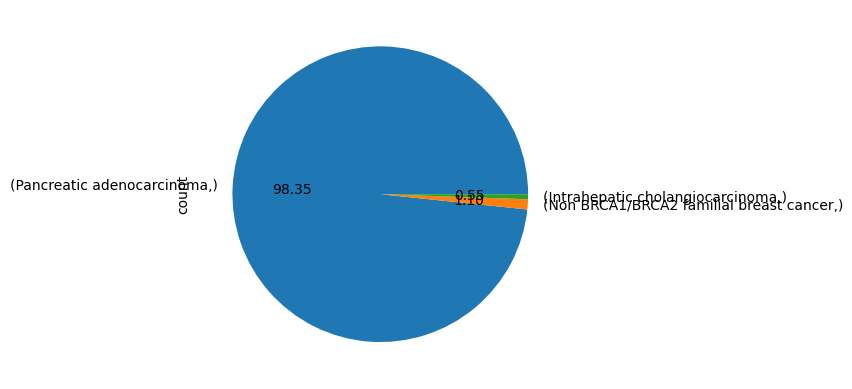

In [8]:
a1 = 'ERR232254'
testing(a1)

In [9]:
o = ['ERR232254']
X = test_data.loc[test_data['SampleID'].isin(o)]
X['cancer'].head(2)

,cancer
1470,Pancreatic adenocarcinoma
1471,Pancreatic adenocarcinoma


## our model predicting correctly for **Pancreatic adenocarcinoma**

<ipython-input-7-44adc387cc52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['VARIANT_CLASS'] = test['VARIANT_CLASS'].map(a1)
<ipython-input-7-44adc387cc52>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SIFT'].fillna(value = 'tolerated',inplace =True)
<ipython-input-7-44adc387cc52>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

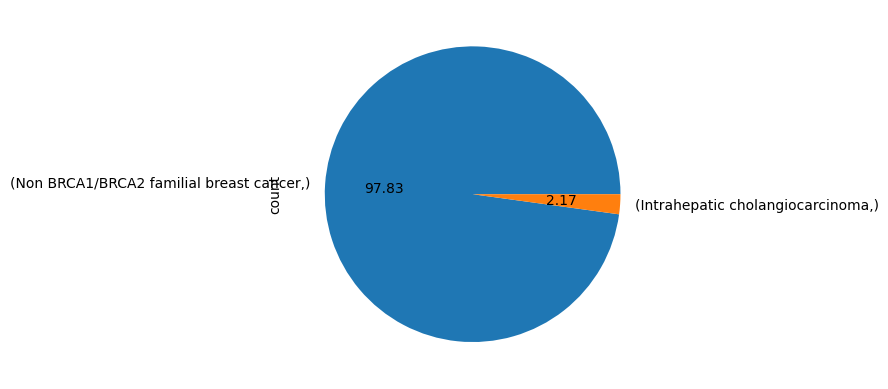

In [10]:
a2 = 'ERR166335'
testing(a2)

In [11]:
o = ['ERR166335']
X = test_data.loc[test_data['SampleID'].isin(o)]
X['cancer'].head(2)

,cancer
1164,Non BRCA1/BRCA2 familial breast cancer
1165,Non BRCA1/BRCA2 familial breast cancer


## Even for cancer type **Non BRCA1/BRCA2 familial breast cancer** prediction is correct

In [12]:
from sklearn.ensemble import RandomForestClassifier


# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, train_x, target, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

# y_train_pred = model.predict(train_x,target)
# y_test_pred = model.predict(x_test)
# y_test_pred
# mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series([ 'MCC_CV'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_cv], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

,Performance_metric_names,Performance_metric_values
0,MCC_CV,0.936585
